## Activity 09


The file ```Galaxy_Sample_Logistic.csv``` in the repository includes the following columns for a large sample of galaxies:

> Morph : morphological classification (1= elliptical, 0= everything else)
>
> Density : Log of the environmental density (proportional to the surface density of galaxies around each object)
>
> Absolute : the r band absolute magnitude of an object (remember magnitudes are defined as -2.5log Luminosity)

Using the programming language of your choice:

Visualize and explore the data, discuss if the correlations you see make sense, given what you have learned in class. 
Using the best practice for Bayesian analysis, model the probability $\theta$ of a galaxy being an elliptical as a function of its environmental density and absolute magnitude.

Compute the 95% credibility interval on $\theta$, in the case of  low and high density environments, and for bright and faint galaxies. [You will have to decide what high/low, faint/bright mean here. Make sure you ae quantitative and motivate your choice].

Discuss which variable dominates in determining whether or not a galaxy has an elliptical morphology.


In [2]:
import numpy as np
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Galaxy_Sample_Logistic.csv')

In [4]:
df

,Morph,Density,Absolute
0,0.0,-0.618151,-19.978269
1,0.0,0.625710,-21.242310
2,0.0,0.406199,-21.313206
3,1.0,1.250364,-19.582105
4,0.0,-0.575648,-19.507471
...,...,...,...
4350,1.0,0.770571,-19.325105
4351,0.0,0.432836,-19.508934
4352,0.0,-0.508340,-19.595806
4353,1.0,-1.086375,-19.997301


In [6]:
import seaborn as sns

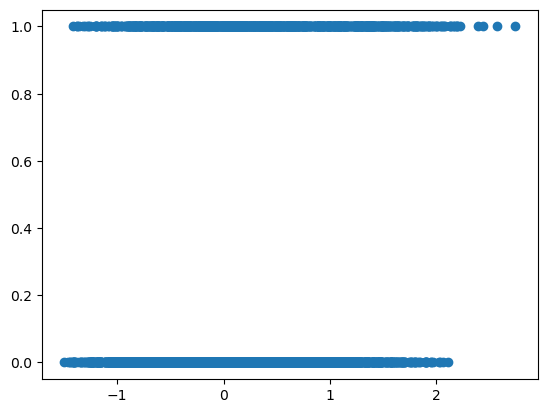

In [9]:
plt.scatter(df['Density'], df['Morph'])

Do we see a connection? potentially!! But not the most obvious one.

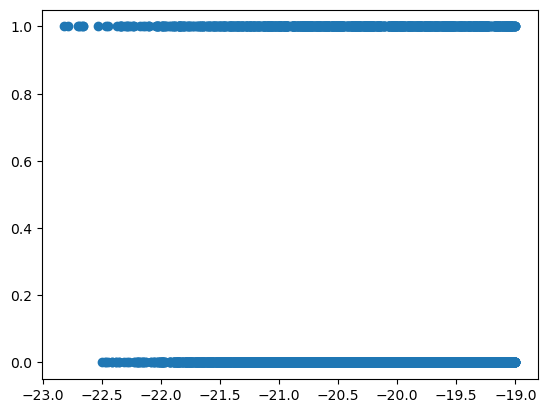

In [10]:
plt.scatter(df['Absolute'], df['Morph'])

Do we see a connection? potentially!! But not the most obvious one.

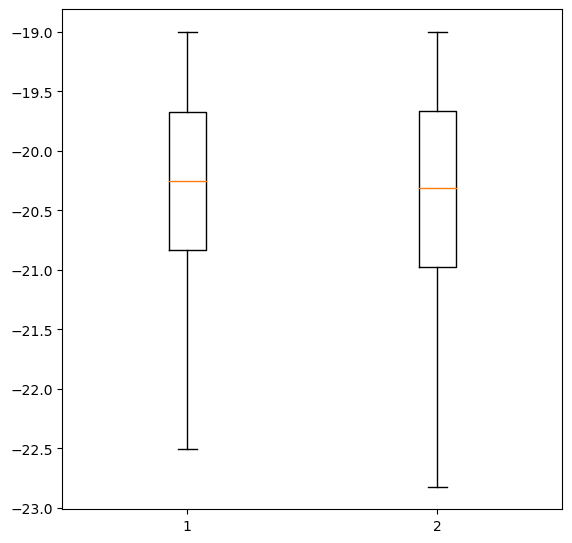

In [13]:
figure = plt.figure(figsize=(5, 5))
ax = figure.add_axes([0,0,1,1])
bp = ax.boxplot([df['Absolute'][df['Morph'] == 0], df['Absolute'][df['Morph'] == 1]])
plt.show()

The means are not that different

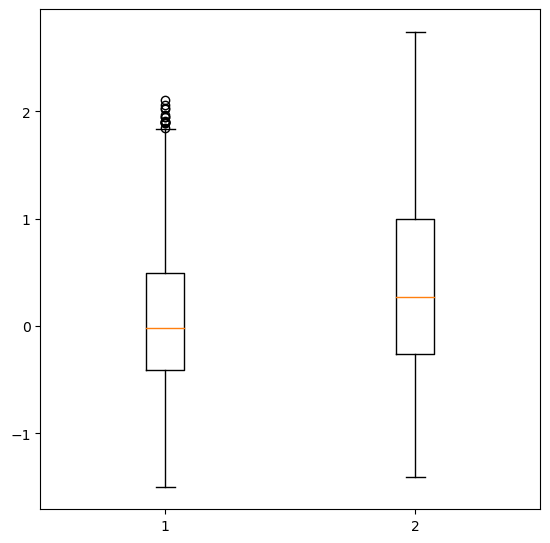

In [14]:
figure = plt.figure(figsize=(5, 5))
ax = figure.add_axes([0,0,1,1])
bp = ax.boxplot([df['Density'][df['Morph'] == 0], df['Density'][df['Morph'] == 1]])
plt.show()

The means are somewhat different

So what is the model? 
My guess is that we can try a logistic regression, and see what the error rate is.
What is our model exactly?
\begin{equation}
Y|X_{1}=x_{1}, X_{2}=x_{2} \sim Binomial(n, \theta(x_{1}. x_{2}))
\end{equation}

\begin{equation}
E[Y|X_{1} =x_{1}, X_{2}=x_{2} ] = g(x_{1}\beta_{1} + x_{2}\beta_{2})
\end{equation}

We will use a sigmoid function:
\begin{equation}
sigmoid(x) = \frac{1}{1 + exp(-x)}
\end{equation}

We are practically modelling the data as 
\begin{equation}
y = sigmoid(x_{1}\beta_{1} + x_{2}\beta_{2} + \beta_{0})
\end{equation}

To do the bayesian logistic regression:
\begin{equation}
log(\frac{\theta}{1 - \theta}) = x_{1}\beta_{1} + x_{2}\beta_{2} + \beta_{0}
\end{equation}

\begin{equation}
\beta \sim N_{p}(m, C^{-}), m = [0, 0, 0], C^{-1} = diag(c_{i}^{-1}), c_{i} \geq 1e3
\end{equation}

In [15]:
n = len(df)
n

4355